<a href="https://colab.research.google.com/github/mou-pi-ya/Pattern-in-.py/blob/main/fifa_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a default theme for the charts
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
# Load the CSV file
fifa_df = pd.read_csv("fifa_data.csv")  # <-- Replace with your file path
fifa_df.head()


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


/tmp/ipython-input-6-129850435.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Overall', y='Name', palette='viridis')


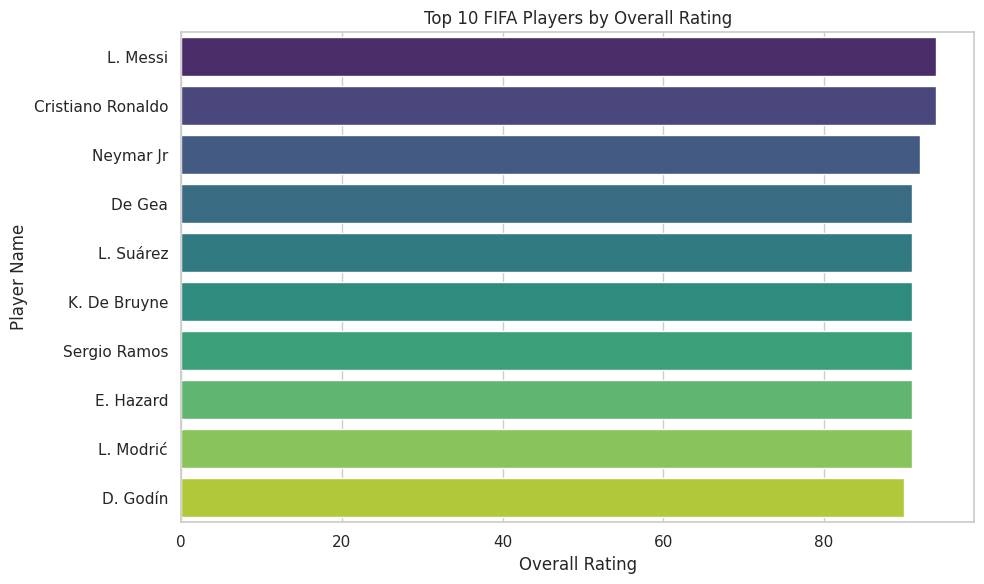

In [6]:
top_10 = fifa_df[['Name', 'Overall']].sort_values(by='Overall', ascending=False).head(10)

sns.barplot(data=top_10, x='Overall', y='Name', palette='viridis')
plt.title('Top 10 FIFA Players by Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()


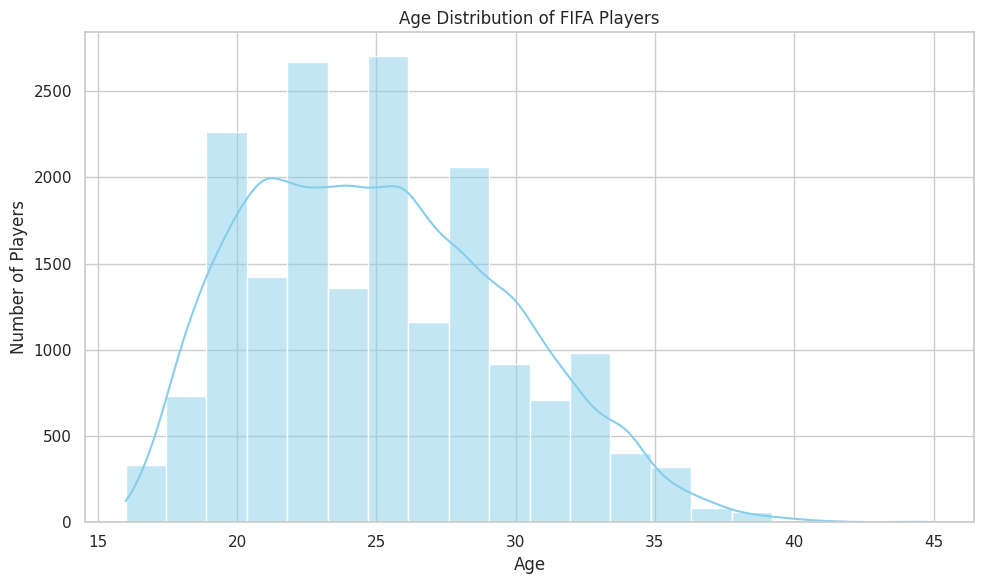

In [7]:
sns.histplot(fifa_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of FIFA Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()


/tmp/ipython-input-8-138166883.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nations.values, y=top_nations.index, palette='coolwarm')


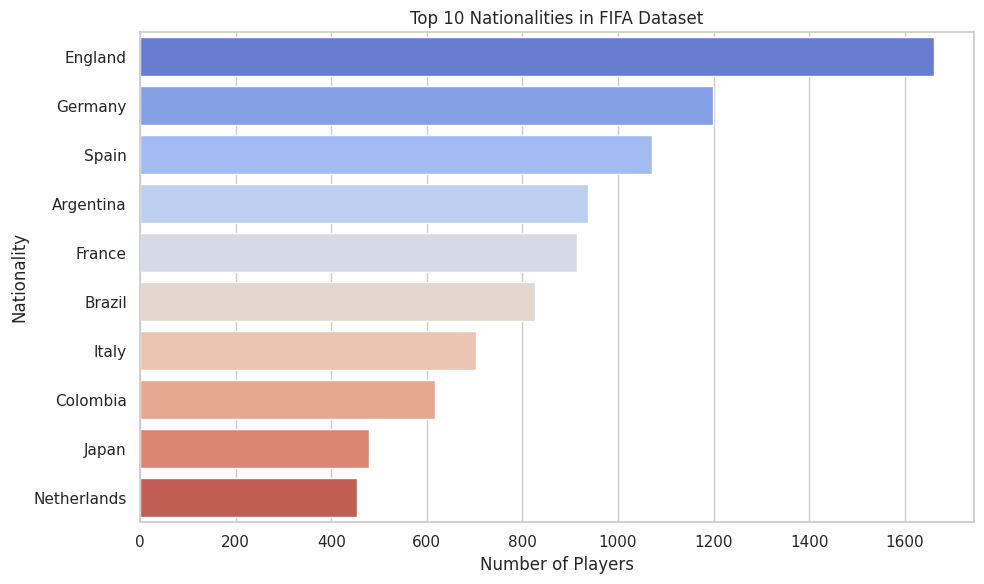

In [8]:
top_nations = fifa_df['Nationality'].value_counts().head(10)

sns.barplot(x=top_nations.values, y=top_nations.index, palette='coolwarm')
plt.title('Top 10 Nationalities in FIFA Dataset')
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()


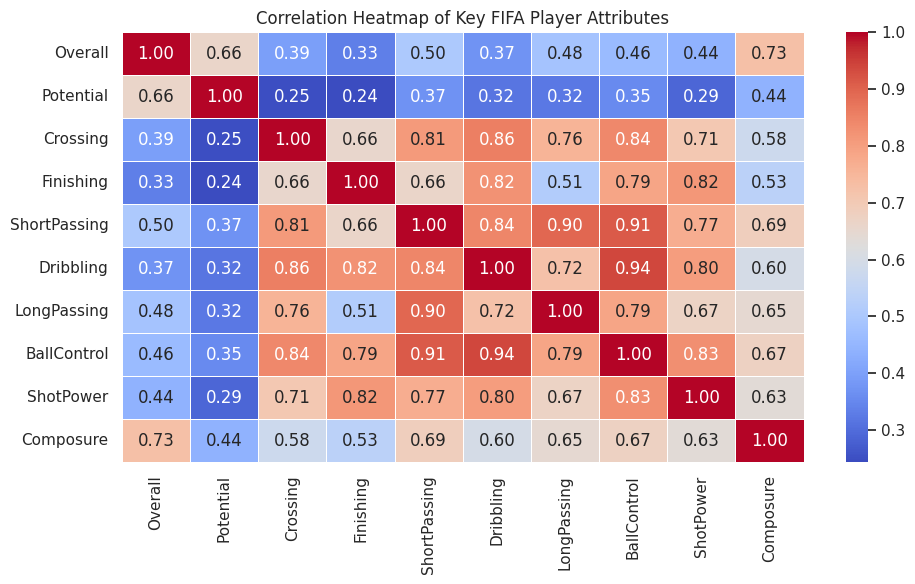

In [9]:
key_attributes = ['Overall', 'Potential', 'Crossing', 'Finishing', 'ShortPassing',
                  'Dribbling', 'LongPassing', 'BallControl', 'ShotPower', 'Composure']

# Clean the data: Drop missing values
correlation_data = fifa_df[key_attributes].dropna()

# Compute correlation matrix
corr_matrix = correlation_data.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Key FIFA Player Attributes')
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-1628038422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma')


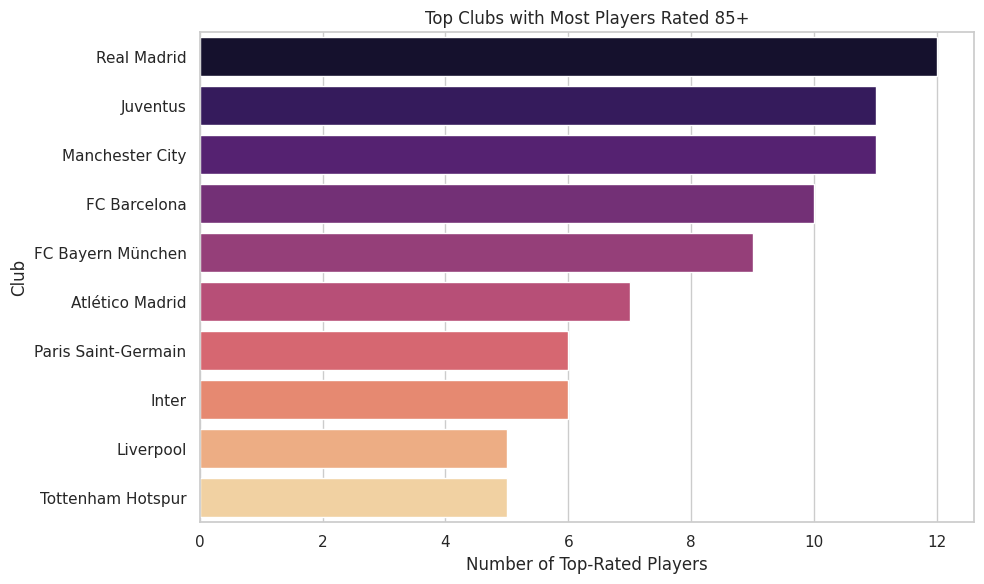

In [11]:
top_players = fifa_df[fifa_df['Overall'] >= 85]
top_clubs = top_players['Club'].value_counts().head(10)

sns.barplot(x=top_clubs.values, y=top_clubs.index, palette='magma')
plt.title('Top Clubs with Most Players Rated 85+')
plt.xlabel('Number of Top-Rated Players')
plt.ylabel('Club')
plt.tight_layout()
plt.show()


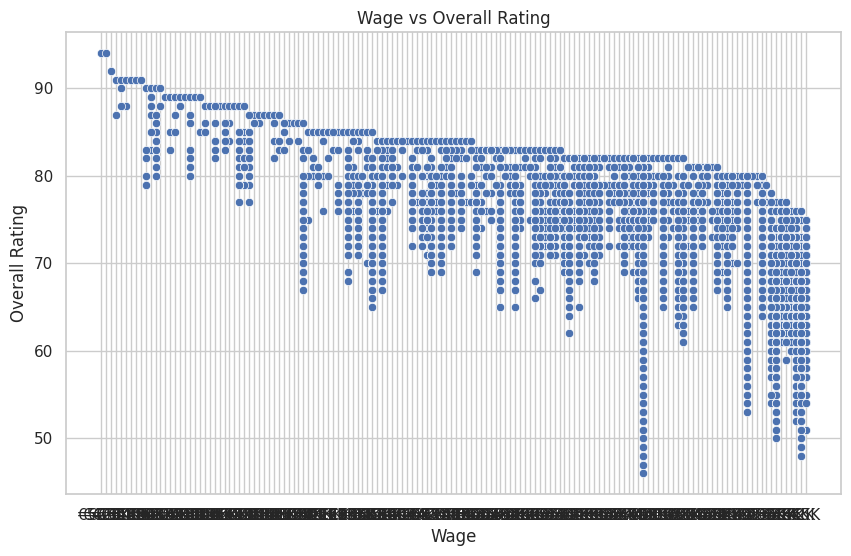

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=fifa_df, x='Wage', y='Overall')
plt.title('Wage vs Overall Rating')
plt.xlabel('Wage')
plt.ylabel('Overall Rating')
plt.show()


In [13]:
fifa_df[['Name', 'Position', 'Overall']].groupby('Position').max().sort_values(by='Overall', ascending=False)


,Name,Overall
Position,,
ST,Éder,94
RF,Zhang Xizhe,94
LW,Álvaro Bustos,92
LF,T. Matsuura,91
RCB,Ícaro,91
RS,Z. Ibrahimović,91
RCM,Óscar,91
GK,Óscar Whalley,91
LCM,Z. Kalmár,90
